In [85]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12
abandon,0,2,0,0,0,0,0,0,0,0,0,0
abc,1,0,0,0,0,0,0,0,0,0,0,0
abcs,0,0,0,1,0,0,0,0,0,0,0,0
abe,0,0,1,0,0,0,0,0,0,0,0,0
aberys,0,0,0,0,1,0,0,0,0,0,0,0


In [86]:
#top 5 words in titles
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(20)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'1': [('trump', 85),
  ('et', 71),
  ('iran', 63),
  ('impeachment', 62),
  ('trial', 47),
  ('new', 36),
  ('soleimani', 35),
  ('president', 35),
  ('house', 34),
  ('senate', 32),
  ('interviewed', 26),
  ('iranian', 26),
  ('sen', 21),
  ('general', 20),
  ('killing', 20),
  ('ukraine', 18),
  ('trumps', 17),
  ('democrats', 17),
  ('strike', 16),
  ('team', 16)],
 '2': [('et', 72),
  ('trump', 54),
  ('nevada', 50),
  ('sanders', 45),
  ('iowa', 38),
  ('coronavirus', 37),
  ('caucuses', 35),
  ('biden', 27),
  ('buttigieg', 25),
  ('south', 23),
  ('primary', 23),
  ('bernie', 23),
  ('carolina', 23),
  ('caucus', 20),
  ('rep', 20),
  ('interview', 20),
  ('democratic', 19),
  ('candidates', 19),
  ('new', 19),
  ('president', 19)],
 '3': [('coronavirus', 203),
  ('et', 77),
  ('trump', 69),
  ('new', 53),
  ('cases', 45),
  ('biden', 31),
  ('deaths', 25),
  ('positive', 24),
  ('sanders', 22),
  ('outbreak', 22),
  ('test', 22),
  ('york', 22),
  ('italy', 21),
  ('says', 21)

In [87]:
# Print the top 15 words
for date, top_words in top_dict.items():
    print(date[:7])
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

1
trump, et, iran, impeachment, trial, new, soleimani, president, house, senate, interviewed, iranian, sen, general
---
2
et, trump, nevada, sanders, iowa, coronavirus, caucuses, biden, buttigieg, south, primary, bernie, carolina, caucus
---
3
coronavirus, et, trump, new, cases, biden, deaths, positive, sanders, outbreak, test, york, italy, says
---
4
coronavirus, et, trump, new, deaths, cases, health, testing, york, death, uk, toll, reopen, pandemic
---
5
et, coronavirus, states, trump, new, reopen, death, reopening, house, white, cases, virus, governor, pandemic
---
6
trump, cases, coronavirus, new, states, et, florida, pence, interview, pandemic, protests, kill, death, police
---
7
cases, trump, et, coronavirus, lewis, john, new, florida, rep, deaths, rights, schools, reopening, reports
---
8
trump, et, coronavirus, cases, election, president, new, stimulus, executive, deaths, shooting, million, house, police
---
9
trump, et, trumps, day, white, house, justice, vaccine, new, labor, 

In [88]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for date in data.columns:
    top = [word for (word, count) in top_dict[date]]
    for t in top:
        words.append(t)
        
words

    
    

['trump',
 'et',
 'iran',
 'impeachment',
 'trial',
 'new',
 'soleimani',
 'president',
 'house',
 'senate',
 'interviewed',
 'iranian',
 'sen',
 'general',
 'killing',
 'ukraine',
 'trumps',
 'democrats',
 'strike',
 'team',
 'et',
 'trump',
 'nevada',
 'sanders',
 'iowa',
 'coronavirus',
 'caucuses',
 'biden',
 'buttigieg',
 'south',
 'primary',
 'bernie',
 'carolina',
 'caucus',
 'rep',
 'interview',
 'democratic',
 'candidates',
 'new',
 'president',
 'coronavirus',
 'et',
 'trump',
 'new',
 'cases',
 'biden',
 'deaths',
 'positive',
 'sanders',
 'outbreak',
 'test',
 'york',
 'italy',
 'says',
 'president',
 'house',
 'state',
 'health',
 'virus',
 'pandemic',
 'coronavirus',
 'et',
 'trump',
 'new',
 'deaths',
 'cases',
 'health',
 'testing',
 'york',
 'death',
 'uk',
 'toll',
 'reopen',
 'pandemic',
 'prime',
 'minister',
 'states',
 'workers',
 'house',
 'cuomo',
 'et',
 'coronavirus',
 'states',
 'trump',
 'new',
 'reopen',
 'death',
 'reopening',
 'house',
 'white',
 'cases',

In [89]:
Counter(words).most_common()

[('trump', 12),
 ('et', 12),
 ('new', 12),
 ('coronavirus', 11),
 ('house', 8),
 ('cases', 8),
 ('president', 7),
 ('biden', 7),
 ('pandemic', 7),
 ('trumps', 6),
 ('states', 5),
 ('election', 5),
 ('interview', 4),
 ('deaths', 4),
 ('virus', 4),
 ('white', 4),
 ('senate', 3),
 ('death', 3),
 ('protests', 3),
 ('million', 3),
 ('vaccine', 3),
 ('sanders', 2),
 ('rep', 2),
 ('positive', 2),
 ('york', 2),
 ('says', 2),
 ('health', 2),
 ('uk', 2),
 ('toll', 2),
 ('reopen', 2),
 ('reopening', 2),
 ('florida', 2),
 ('police', 2),
 ('cdc', 2),
 ('rally', 2),
 ('california', 2),
 ('georgia', 2),
 ('covid', 2),
 ('iran', 1),
 ('impeachment', 1),
 ('trial', 1),
 ('soleimani', 1),
 ('interviewed', 1),
 ('iranian', 1),
 ('sen', 1),
 ('general', 1),
 ('killing', 1),
 ('ukraine', 1),
 ('democrats', 1),
 ('strike', 1),
 ('team', 1),
 ('nevada', 1),
 ('iowa', 1),
 ('caucuses', 1),
 ('buttigieg', 1),
 ('south', 1),
 ('primary', 1),
 ('bernie', 1),
 ('carolina', 1),
 ('caucus', 1),
 ('democratic', 1),


In [90]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = ['et']

In [91]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [92]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

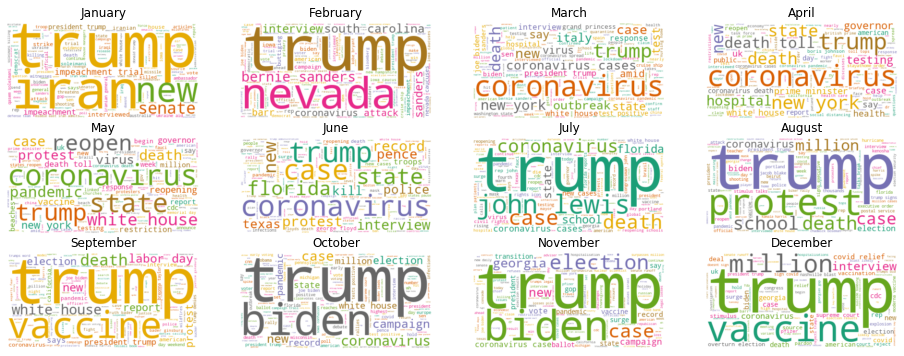

In [93]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

dates = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']

# Create subplots for each month
for index, date in enumerate(data.columns):
    wc.generate(data_clean.transcript[date])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(dates[index])
    
plt.show()